# 📦 Product Performance Matrix Analysis

**Purpose:** Deep-dive into product performance using velocity, value, and strategic quadrants  
**Data Source:** `data/context_states/consolidated_analysis_20251022_173402/`  
**Generated:** 2025-10-23  
**For:** Inventory & Product Managers

---

## 📋 Analysis Overview

This notebook provides **strategic product insights** using:

1. **Performance Matrix** - 4 strategic quadrants (Stars, Cash Cows, Workhorses, Dead Stock)
2. **Pareto Analysis** - 80/20 rule for revenue concentration
3. **ABC Classification** - Product segmentation by value
4. **Velocity Analysis** - Sales speed and turnover rates
5. **Strategic Recommendations** - Actionable next steps per product category

## 🔧 Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configure style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Colors
COLORS = {
    'primary': '#2E86AB',
    'success': '#06A77D',
    'warning': '#F18F01',
    'danger': '#C73E1D',
    'neutral': '#6C757D',
    'stars': '#FFD700',
    'cash_cows': '#06A77D',
    'workhorses': '#F18F01',
    'dead_stock': '#C73E1D'
}

print("✅ Libraries loaded")

✅ Libraries loaded


In [2]:
# Setup paths
import os
DATA_PATH = '../../data/context_states/consolidated_analysis_20251022_173402/datasets/'
OUTPUT_DIR = '02_product_performance_matrix'
os.makedirs(OUTPUT_DIR, exist_ok=True)
print(f"📁 Output: {OUTPUT_DIR}/")

# Load data
df_products = pd.read_csv(f'{DATA_PATH}product_daily_attrs.csv')
df_products['dt_date'] = pd.to_datetime(df_products['dt_date'], format='%Y%m%d')
print(f"✅ Loaded: {len(df_products)} product-day records")

df_daily = pd.read_csv(f'{DATA_PATH}daily_attrs.csv')
df_daily['dt_date'] = pd.to_datetime(df_daily['dt_date'], format='%Y%m%d')
print(f"✅ Loaded: {len(df_daily)} daily records")

📁 Output: 02_product_performance_matrix/
✅ Loaded: 266 product-day records
✅ Loaded: 30 daily records


## 📊 Product Aggregation

In [3]:
# Calculate period metrics
date_min = df_products['dt_date'].min()
date_max = df_products['dt_date'].max()
days_in_period = (date_max - date_min).days + 1

print(f"📅 Analysis Period: {date_min.strftime('%Y-%m-%d')} to {date_max.strftime('%Y-%m-%d')} ({days_in_period} days)")

# Aggregate by product
product_summary = df_products.groupby('in_product_id').agg({
    'price_total_sum': 'sum',
    'cost_total_sum': 'sum',
    'quantity_sum': 'sum',
    'trans_id_count': 'sum',
    'customer_id_count': 'sum'
}).reset_index()

product_summary.columns = ['product_id', 'total_revenue', 'total_cost', 'units_sold', 'transactions', 'customers']

# Calculate metrics
product_summary['profit'] = product_summary['total_revenue'] - product_summary['total_cost']
product_summary['margin_pct'] = (product_summary['profit'] / product_summary['total_revenue']) * 100
product_summary['avg_price'] = product_summary['total_revenue'] / product_summary['units_sold']
product_summary['velocity'] = product_summary['units_sold'] / days_in_period  # units per day
product_summary['revenue_pct'] = (product_summary['total_revenue'] / product_summary['total_revenue'].sum()) * 100

# Sort by revenue
product_summary = product_summary.sort_values('total_revenue', ascending=False).reset_index(drop=True)

print(f"\n✅ Analyzed {len(product_summary)} products")
print(f"   Total Revenue: ${product_summary['total_revenue'].sum():,.2f}")
print(f"   Total Units: {product_summary['units_sold'].sum():,.0f}")

📅 Analysis Period: 2025-10-01 to 2025-10-30 (30 days)

✅ Analyzed 10 products
   Total Revenue: $53,495,820.00
   Total Units: 2,347


---
# 1️⃣ Product Performance Matrix
## 4-Quadrant Strategic Analysis

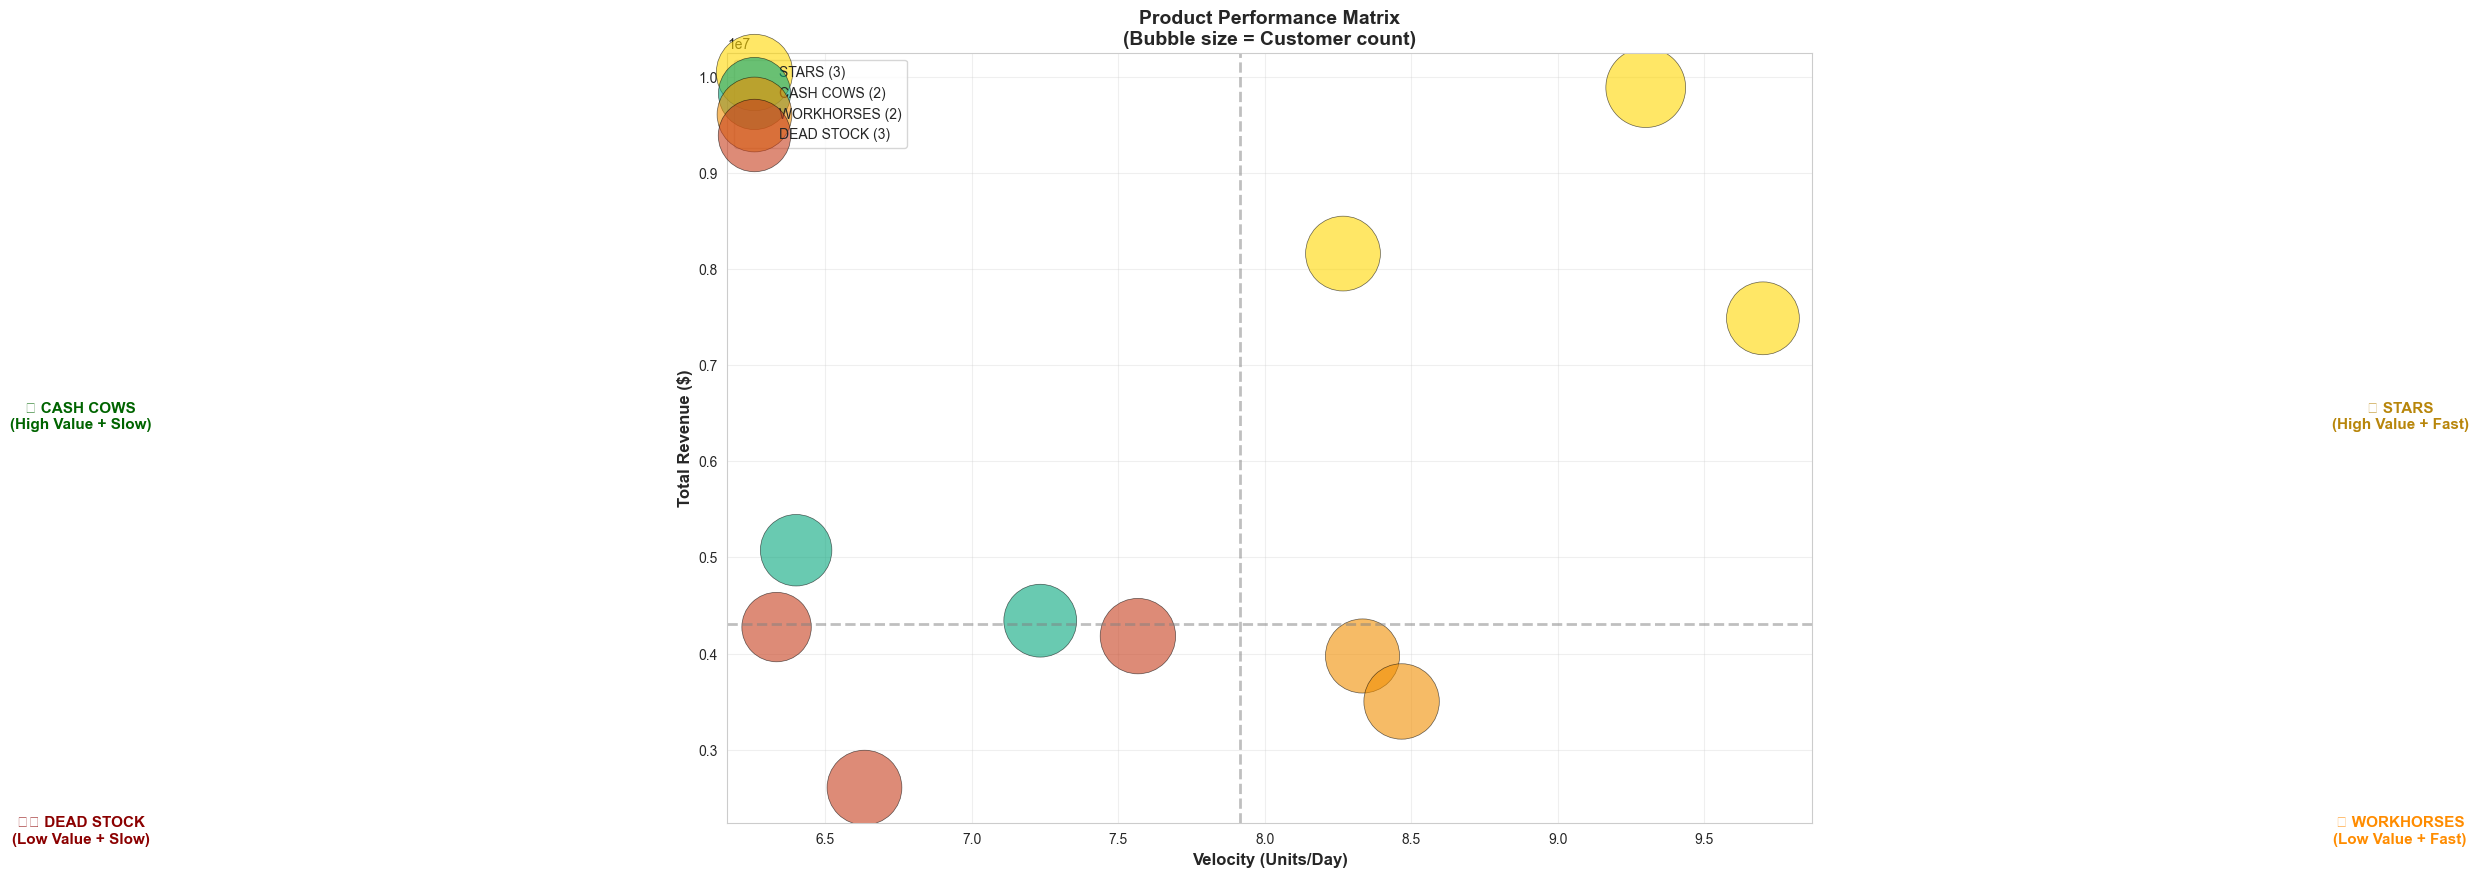

💾 Saved: 02_product_performance_matrix/01_performance_matrix.png


In [4]:
# Calculate medians for quadrants
median_velocity = product_summary['velocity'].median()
median_revenue = product_summary['total_revenue'].median()

# Classify into quadrants
def classify_quadrant(row):
    if row['velocity'] > median_velocity and row['total_revenue'] > median_revenue:
        return 'STARS'
    elif row['velocity'] <= median_velocity and row['total_revenue'] > median_revenue:
        return 'CASH COWS'
    elif row['velocity'] > median_velocity and row['total_revenue'] <= median_revenue:
        return 'WORKHORSES'
    else:
        return 'DEAD STOCK'

product_summary['quadrant'] = product_summary.apply(classify_quadrant, axis=1)

# Create scatter plot
fig, ax = plt.subplots(figsize=(14, 10))

quadrant_colors = {
    'STARS': COLORS['stars'],
    'CASH COWS': COLORS['cash_cows'],
    'WORKHORSES': COLORS['workhorses'],
    'DEAD STOCK': COLORS['dead_stock']
}

for quadrant, color in quadrant_colors.items():
    data = product_summary[product_summary['quadrant'] == quadrant]
    ax.scatter(data['velocity'], data['total_revenue'], 
               s=data['customers']*50, alpha=0.6, c=color, 
               label=f"{quadrant} ({len(data)})", edgecolors='black', linewidth=0.5)

# Quadrant lines
ax.axvline(median_velocity, color='gray', linestyle='--', alpha=0.5, linewidth=2)
ax.axhline(median_revenue, color='gray', linestyle='--', alpha=0.5, linewidth=2)

# Quadrant labels
ax.text(median_velocity*1.5, median_revenue*1.5, '⭐ STARS\n(High Value + Fast)', 
        ha='center', va='center', fontsize=11, fontweight='bold', color='darkgoldenrod',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax.text(median_velocity*0.5, median_revenue*1.5, '💰 CASH COWS\n(High Value + Slow)', 
        ha='center', va='center', fontsize=11, fontweight='bold', color='darkgreen',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax.text(median_velocity*1.5, median_revenue*0.5, '🔧 WORKHORSES\n(Low Value + Fast)', 
        ha='center', va='center', fontsize=11, fontweight='bold', color='darkorange',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax.text(median_velocity*0.5, median_revenue*0.5, '⚠️ DEAD STOCK\n(Low Value + Slow)', 
        ha='center', va='center', fontsize=11, fontweight='bold', color='darkred',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax.set_xlabel('Velocity (Units/Day)', fontsize=12, fontweight='bold')
ax.set_ylabel('Total Revenue ($)', fontsize=12, fontweight='bold')
ax.set_title('Product Performance Matrix\n(Bubble size = Customer count)', fontsize=14, fontweight='bold')
ax.legend(loc='upper left', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/01_performance_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"💾 Saved: {OUTPUT_DIR}/01_performance_matrix.png")

## 📊 Quadrant Summary

In [5]:
# Summarize by quadrant
quadrant_summary = product_summary.groupby('quadrant').agg({
    'product_id': 'count',
    'total_revenue': 'sum',
    'profit': 'sum',
    'units_sold': 'sum'
}).reset_index()

quadrant_summary.columns = ['Quadrant', 'Products', 'Revenue', 'Profit', 'Units']
quadrant_summary['Revenue %'] = (quadrant_summary['Revenue'] / quadrant_summary['Revenue'].sum()) * 100

# Order quadrants
quadrant_order = ['STARS', 'CASH COWS', 'WORKHORSES', 'DEAD STOCK']
quadrant_summary['Quadrant'] = pd.Categorical(quadrant_summary['Quadrant'], categories=quadrant_order, ordered=True)
quadrant_summary = quadrant_summary.sort_values('Quadrant')

print("\n" + "="*70)
print("📊 QUADRANT SUMMARY")
print("="*70)
print(quadrant_summary.to_string(index=False))

# Strategic insights
stars = product_summary[product_summary['quadrant'] == 'STARS']
cash_cows = product_summary[product_summary['quadrant'] == 'CASH COWS']
workhorses = product_summary[product_summary['quadrant'] == 'WORKHORSES']
dead_stock = product_summary[product_summary['quadrant'] == 'DEAD STOCK']

print("\n💡 KEY INSIGHTS:")
print(f"   ⭐ STARS: {len(stars)} products generating ${stars['total_revenue'].sum():,.0f} ({(stars['total_revenue'].sum()/product_summary['total_revenue'].sum()*100):.1f}%)")
print(f"   💰 CASH COWS: {len(cash_cows)} products generating ${cash_cows['total_revenue'].sum():,.0f} ({(cash_cows['total_revenue'].sum()/product_summary['total_revenue'].sum()*100):.1f}%)")
print(f"   🔧 WORKHORSES: {len(workhorses)} products generating ${workhorses['total_revenue'].sum():,.0f} ({(workhorses['total_revenue'].sum()/product_summary['total_revenue'].sum()*100):.1f}%)")
print(f"   ⚠️ DEAD STOCK: {len(dead_stock)} products generating ${dead_stock['total_revenue'].sum():,.0f} ({(dead_stock['total_revenue'].sum()/product_summary['total_revenue'].sum()*100):.1f}%)")


📊 QUADRANT SUMMARY
  Quadrant  Products    Revenue    Profit  Units  Revenue %
     STARS         3 25536392.0 7498361.0    818  47.735303
 CASH COWS         2  9417778.0 3331240.0    409  17.604699
WORKHORSES         2  7477557.0 2241601.0    504  13.977834
DEAD STOCK         3 11064093.0 3534147.0    616  20.682164

💡 KEY INSIGHTS:
   ⭐ STARS: 3 products generating $25,536,392 (47.7%)
   💰 CASH COWS: 2 products generating $9,417,778 (17.6%)
   🔧 WORKHORSES: 2 products generating $7,477,557 (14.0%)
   ⚠️ DEAD STOCK: 3 products generating $11,064,093 (20.7%)


---
# 2️⃣ Pareto Analysis
## 80/20 Revenue Concentration

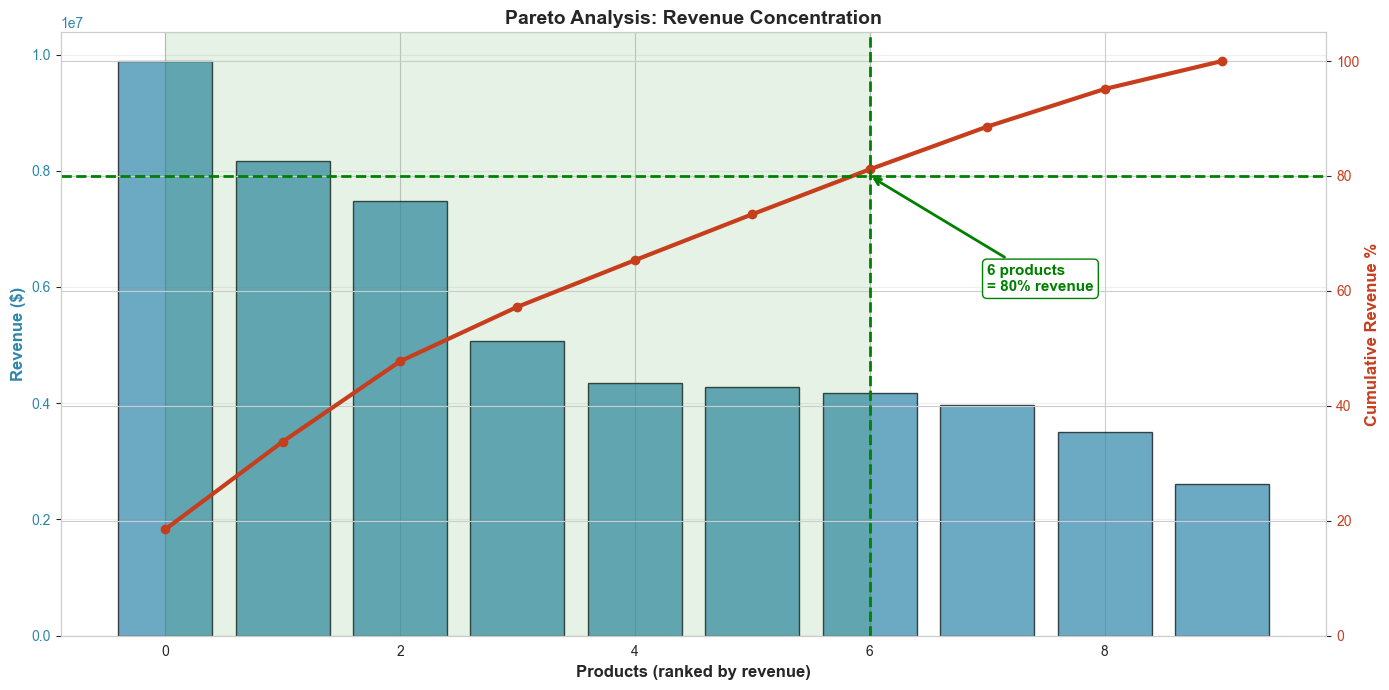


💡 PARETO INSIGHT:
   6 products (60.0%) generate 80% of revenue
   Revenue concentration: $39,230,240.00

🎯 FOCUS: Prioritize inventory for these 6 critical products
💾 Saved: 02_product_performance_matrix/02_pareto_analysis.png


In [6]:
# Calculate cumulative percentages
product_summary['cumulative_revenue'] = product_summary['total_revenue'].cumsum()
product_summary['cumulative_pct'] = (product_summary['cumulative_revenue'] / product_summary['total_revenue'].sum()) * 100

# Find 80% threshold
products_80 = len(product_summary[product_summary['cumulative_pct'] <= 80])
revenue_80 = product_summary[product_summary['cumulative_pct'] <= 80]['total_revenue'].sum()

# Pareto chart
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar chart
x = range(len(product_summary))
ax1.bar(x, product_summary['total_revenue'], color=COLORS['primary'], alpha=0.7, edgecolor='black')
ax1.set_xlabel('Products (ranked by revenue)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Revenue ($)', color=COLORS['primary'], fontsize=12, fontweight='bold')
ax1.tick_params(axis='y', labelcolor=COLORS['primary'])

# Line chart (cumulative %)
ax2 = ax1.twinx()
ax2.plot(x, product_summary['cumulative_pct'], color=COLORS['danger'], marker='o', linewidth=3, markersize=6)
ax2.axhline(80, color='green', linestyle='--', linewidth=2, label='80% Line')
ax2.axvline(products_80, color='green', linestyle='--', linewidth=2)
ax2.set_ylabel('Cumulative Revenue %', color=COLORS['danger'], fontsize=12, fontweight='bold')
ax2.tick_params(axis='y', labelcolor=COLORS['danger'])
ax2.set_ylim(0, 105)

# Highlight 80% zone
ax1.axvspan(0, products_80, alpha=0.1, color='green')

# Annotation
ax2.annotate(f'{products_80} products\n= 80% revenue', 
             xy=(products_80, 80), xytext=(products_80+1, 60),
             arrowprops=dict(arrowstyle='->', color='green', lw=2),
             fontsize=11, fontweight='bold', color='green',
             bbox=dict(boxstyle='round', facecolor='white', edgecolor='green'))

ax1.set_title('Pareto Analysis: Revenue Concentration', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/02_pareto_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n💡 PARETO INSIGHT:")
print(f"   {products_80} products ({products_80/len(product_summary)*100:.1f}%) generate 80% of revenue")
print(f"   Revenue concentration: ${revenue_80:,.2f}")
print(f"\n🎯 FOCUS: Prioritize inventory for these {products_80} critical products")
print(f"💾 Saved: {OUTPUT_DIR}/02_pareto_analysis.png")

---
# 3️⃣ ABC Classification
## Value-Based Segmentation

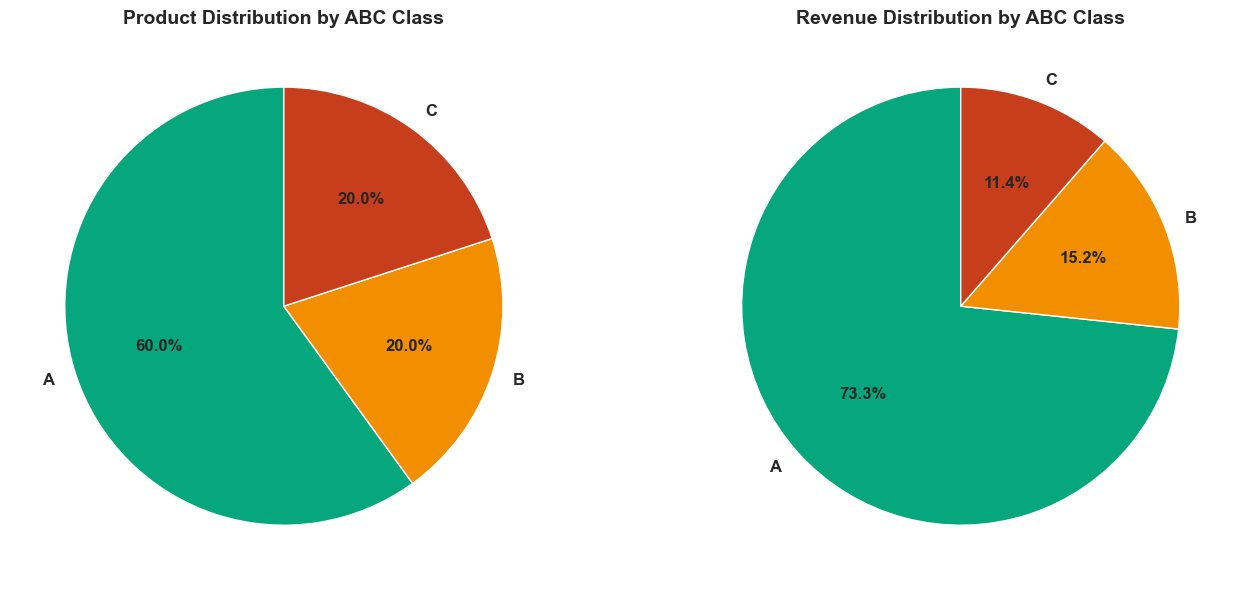


📊 ABC CLASSIFICATION
Class  Products    Revenue     Profit  Revenue %  Products %
    A         6 39230240.0 12175495.0  73.333281        60.0
    B         2  8157227.0  2609894.0  15.248345        20.0
    C         2  6108353.0  1819960.0  11.418374        20.0

💡 MANAGEMENT STRATEGY:
   📗 Class A (6 products): Tight control, never stock out
   📙 Class B (2 products): Moderate control, regular review
   📕 Class C (2 products): Loose control, optimize or discontinue

💾 Saved: 02_product_performance_matrix/03_abc_classification.png


In [7]:
# ABC classification
def classify_abc(cumulative_pct):
    if cumulative_pct <= 80:
        return 'A'
    elif cumulative_pct <= 95:
        return 'B'
    else:
        return 'C'

product_summary['abc_class'] = product_summary['cumulative_pct'].apply(classify_abc)

# Summary by class
abc_summary = product_summary.groupby('abc_class').agg({
    'product_id': 'count',
    'total_revenue': 'sum',
    'profit': 'sum'
}).reset_index()

abc_summary.columns = ['Class', 'Products', 'Revenue', 'Profit']
abc_summary['Revenue %'] = (abc_summary['Revenue'] / abc_summary['Revenue'].sum()) * 100
abc_summary['Products %'] = (abc_summary['Products'] / abc_summary['Products'].sum()) * 100

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Left: Products distribution
colors_abc = [COLORS['success'], COLORS['warning'], COLORS['danger']]
ax1.pie(abc_summary['Products'], labels=abc_summary['Class'], autopct='%1.1f%%', 
        startangle=90, colors=colors_abc, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax1.set_title('Product Distribution by ABC Class', fontsize=14, fontweight='bold')

# Right: Revenue distribution
ax2.pie(abc_summary['Revenue'], labels=abc_summary['Class'], autopct='%1.1f%%',
        startangle=90, colors=colors_abc, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax2.set_title('Revenue Distribution by ABC Class', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/03_abc_classification.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "="*70)
print("📊 ABC CLASSIFICATION")
print("="*70)
print(abc_summary.to_string(index=False))

print("\n💡 MANAGEMENT STRATEGY:")
print(f"   📗 Class A ({abc_summary[abc_summary['Class']=='A']['Products'].values[0]} products): Tight control, never stock out")
print(f"   📙 Class B ({abc_summary[abc_summary['Class']=='B']['Products'].values[0]} products): Moderate control, regular review")
print(f"   📕 Class C ({abc_summary[abc_summary['Class']=='C']['Products'].values[0]} products): Loose control, optimize or discontinue")
print(f"\n💾 Saved: {OUTPUT_DIR}/03_abc_classification.png")

---
# 4️⃣ Velocity Analysis
## Sales Speed & Turnover

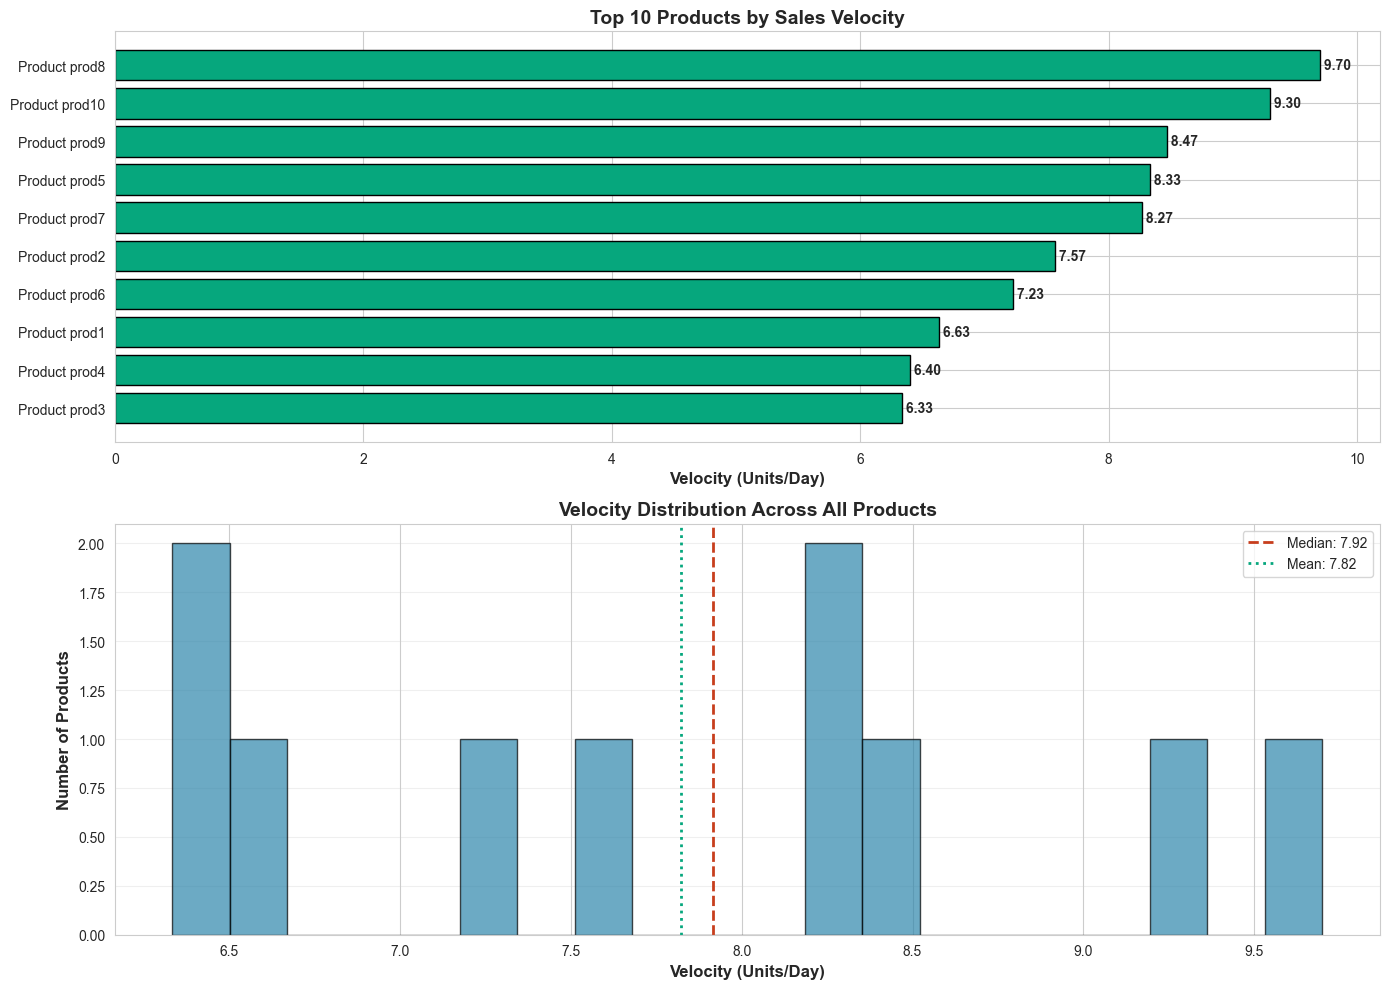


💡 VELOCITY INSIGHTS:
   Fastest: Product prod8 (9.70 units/day)
   Slowest: Product prod3 (6.33 units/day)
   Average: 7.82 units/day

💾 Saved: 02_product_performance_matrix/04_velocity_analysis.png


In [8]:
# Velocity distribution
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Top: Velocity by product
velocity_sorted = product_summary.sort_values('velocity', ascending=False).head(10)
ax1.barh(range(len(velocity_sorted)), velocity_sorted['velocity'], color=COLORS['success'], edgecolor='black')
ax1.set_yticks(range(len(velocity_sorted)))
ax1.set_yticklabels([f"Product {pid}" for pid in velocity_sorted['product_id']])
ax1.set_xlabel('Velocity (Units/Day)', fontsize=12, fontweight='bold')
ax1.set_title('Top 10 Products by Sales Velocity', fontsize=14, fontweight='bold')
ax1.invert_yaxis()

for i, v in enumerate(velocity_sorted['velocity']):
    ax1.text(v, i, f' {v:.2f}', va='center', fontweight='bold')

# Bottom: Velocity histogram
ax2.hist(product_summary['velocity'], bins=20, color=COLORS['primary'], edgecolor='black', alpha=0.7)
ax2.axvline(product_summary['velocity'].median(), color=COLORS['danger'], linestyle='--', linewidth=2,
            label=f"Median: {product_summary['velocity'].median():.2f}")
ax2.axvline(product_summary['velocity'].mean(), color=COLORS['success'], linestyle=':', linewidth=2,
            label=f"Mean: {product_summary['velocity'].mean():.2f}")
ax2.set_xlabel('Velocity (Units/Day)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Products', fontsize=12, fontweight='bold')
ax2.set_title('Velocity Distribution Across All Products', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/04_velocity_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\n💡 VELOCITY INSIGHTS:")
print(f"   Fastest: Product {velocity_sorted.iloc[0]['product_id']} ({velocity_sorted.iloc[0]['velocity']:.2f} units/day)")
print(f"   Slowest: Product {product_summary.nsmallest(1, 'velocity').iloc[0]['product_id']} ({product_summary['velocity'].min():.2f} units/day)")
print(f"   Average: {product_summary['velocity'].mean():.2f} units/day")
print(f"\n💾 Saved: {OUTPUT_DIR}/04_velocity_analysis.png")

---
# 📋 Strategic Recommendations

In [9]:
print("="*70)
print("🎯 STRATEGIC RECOMMENDATIONS BY QUADRANT")
print("="*70)

recommendations = []

# STARS
if len(stars) > 0:
    print(f"\n⭐ STARS ({len(stars)} products):")
    print(f"   Revenue: ${stars['total_revenue'].sum():,.0f}")
    print(f"   Strategy: INVEST & PROTECT")
    print(f"   Actions:")
    print(f"   1. Never allow stock-outs - set min stock levels 2x normal")
    print(f"   2. Negotiate better supplier terms (volume discounts)")
    print(f"   3. Feature prominently in marketing campaigns")
    print(f"   4. Monitor competitor pricing closely")
    recommendations.append(("Protect STARS inventory", "HIGH", "Immediate"))

# CASH COWS
if len(cash_cows) > 0:
    print(f"\n💰 CASH COWS ({len(cash_cows)} products):")
    print(f"   Revenue: ${cash_cows['total_revenue'].sum():,.0f}")
    print(f"   Strategy: MAINTAIN & OPTIMIZE")
    print(f"   Actions:")
    print(f"   1. Maintain steady supply without excess inventory")
    print(f"   2. Bundle with faster-moving items to increase velocity")
    print(f"   3. Consider promotions to accelerate turnover")
    print(f"   4. Review pricing - may have room for optimization")
    recommendations.append(("Optimize CASH COWS pricing", "MEDIUM", "1-2 weeks"))

# WORKHORSES
if len(workhorses) > 0:
    print(f"\n🔧 WORKHORSES ({len(workhorses)} products):")
    print(f"   Revenue: ${workhorses['total_revenue'].sum():,.0f}")
    print(f"   Strategy: IMPROVE MARGINS")
    print(f"   Actions:")
    print(f"   1. Negotiate better cost prices (high volume leverage)")
    print(f"   2. Consider slight price increases (demand is strong)")
    print(f"   3. Streamline fulfillment to reduce handling costs")
    print(f"   4. Explore private label alternatives")
    recommendations.append(("Improve WORKHORSES margins", "MEDIUM", "2-4 weeks"))

# DEAD STOCK
if len(dead_stock) > 0:
    print(f"\n⚠️ DEAD STOCK ({len(dead_stock)} products):")
    print(f"   Revenue: ${dead_stock['total_revenue'].sum():,.0f}")
    print(f"   Strategy: LIQUIDATE OR DISCONTINUE")
    print(f"   Actions:")
    print(f"   1. Run clearance sale (20-30% discount)")
    print(f"   2. Bundle with popular items to move inventory")
    print(f"   3. Discontinue and replace with better alternatives")
    print(f"   4. Free up capital and shelf space")
    recommendations.append((f"Liquidate {len(dead_stock)} DEAD STOCK items", "HIGH", "2 weeks"))

print("\n" + "="*70)
print("📊 TOP 5 PRIORITY ACTIONS")
print("="*70)

# Add general recommendations
recommendations.append((f"Focus inventory investment on {products_80} products (80% rule)", "HIGH", "Immediate"))
recommendations.append(("Weekly velocity monitoring for Class A products", "MEDIUM", "Ongoing"))

for i, (action, priority, timeline) in enumerate(recommendations[:5], 1):
    print(f"\n{i}. {action}")
    print(f"   Priority: {priority} | Timeline: {timeline}")

print("\n" + "="*70)

# Summary
print(f"\n📁 All outputs saved to: {OUTPUT_DIR}/")
import glob
files = sorted(glob.glob(f'{OUTPUT_DIR}/*.png'))
print(f"\nGenerated {len(files)} visualizations:")
for f in files:
    print(f"  - {f}")

print("\n✅ Analysis Complete!")

🎯 STRATEGIC RECOMMENDATIONS BY QUADRANT

⭐ STARS (3 products):
   Revenue: $25,536,392
   Strategy: INVEST & PROTECT
   Actions:
   1. Never allow stock-outs - set min stock levels 2x normal
   2. Negotiate better supplier terms (volume discounts)
   3. Feature prominently in marketing campaigns
   4. Monitor competitor pricing closely

💰 CASH COWS (2 products):
   Revenue: $9,417,778
   Strategy: MAINTAIN & OPTIMIZE
   Actions:
   1. Maintain steady supply without excess inventory
   2. Bundle with faster-moving items to increase velocity
   3. Consider promotions to accelerate turnover
   4. Review pricing - may have room for optimization

🔧 WORKHORSES (2 products):
   Revenue: $7,477,557
   Strategy: IMPROVE MARGINS
   Actions:
   1. Negotiate better cost prices (high volume leverage)
   2. Consider slight price increases (demand is strong)
   3. Streamline fulfillment to reduce handling costs
   4. Explore private label alternatives

⚠️ DEAD STOCK (3 products):
   Revenue: $11,064,